# Part 1 - Question Answering

For the first part, use the Hugging Face question-answering pipeline and feed it with the five 300-word long sections from the book of your choice that you analyzed in Project 1.

These sections should be selected so they are: introducing the protagonist(s), the antagonist, the crime and crime scene, any significant evidence, and the resolution of the crime/a narrative that presents the case against the perpetrator.

For a prompt, Implement a simple prompt interface that takes in your question, runs it against the model, and returns the answer. You don't need to do anything special about this, just a simple console I/O interface without any complicated error handling. It is up to you how you want to upload the context to the model (pre-loaded into your program, on-demand, etc.).

The questions you should ask are about the identity and characteristics of the protagonist, antagonist/perpetrator, the nature and the setting of the crime or crime scene, the evidence, and the case against the perpetrator.

Document the questions, ask the questions, and document the specificity and accuracy of the results.

Part 1.2 - use two different HF QA models: use the default question-answering pipeline, then use other models of choice and discuss the differences in the result.

https://huggingface.co/docs/transformers/main_classes/pipelines

https://huggingface.co/docs/transformers/v4.35.0/en/main_classes/pipelines#transformers.QuestionAnsweringPipeline


In [1]:
!pip3 install -r ../requirements.txt

%load_ext autoreload
%autoreload 2


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
from collections import defaultdict


from src import utils
from src.question_answering import run, run_models


/mnt/Documents/GitHub/UTK-Classes/CS524-Natural-Language-Processing/projects/ChatPI/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
---

## Experiments & Results

For the first part, use the Hugging Face question-answering pipeline and feed it with the five 300-word long sections from the book of your choice that you analyzed in Project 1.

These sections should be selected so they are: **introducing the protagonist(s), the antagonist, the crime and crime scene, any significant evidence, and the resolution of the crime/a narrative that presents the case against the perpetrator.**

The questions you should ask are about the identity and characteristics of the protagonist, antagonist/perpetrator, the nature and the setting of the crime or crime scene, the evidence, and the case against the perpetrator.

Document the questions, ask the questions, and document the specificity and accuracy of the results.


In [3]:
# TODO: Try out a good selection of models and keep some interesting ones
models = [
    "distilbert-base-uncased-distilled-squad",
    "deepset/roberta-base-squad2",
]


Found: ['protagonist.0.md', 'protagonist.qa.md']
################################################################################
################################################################################
Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case. With his long, white, nervous fingers he adjusted the delicate needle, and rolled back his left shirt-cuff. For some little time his eyes rested thoughtfully upon the sinewy forearm and wrist all dotted and scarred with innumerable puncture-marks. Finally he thrust the sharp point home, pressed down the tiny piston, and sank back into the velvet-lined arm-chair with a long sigh of satisfaction. Three times a day for many months I had witnessed this performance, but custom had not reconciled my mind to it. On the contrary, from day to day I had become more irritable at the sight, and my conscience swelled nightly within me at the thought that I had lacked the

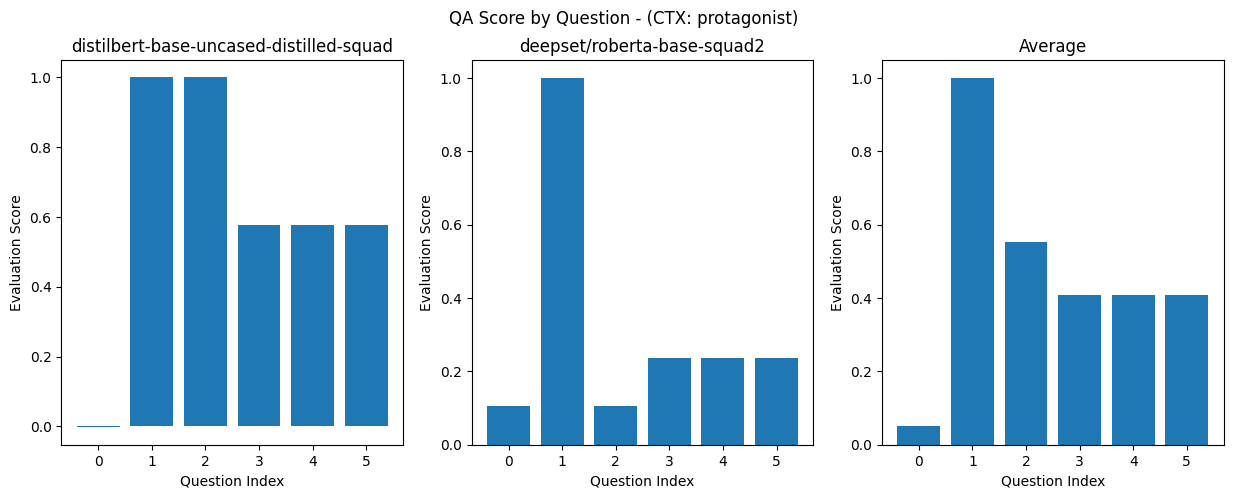

╔═════════╦═════════════════════════════════════════╦═════════╦═══════════════════════════════════════════════════════════════════════════╦═════════════════════════╗
║ Q Idx   ║ Model                                   ║   Score ║ Question                                                                  ║ Answer                  ║
╠═════════╬═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════╬═════════════════════════╣
║ 0       ║ distilbert-base-uncased-distilled-squad ║ -0.0026 ║ Who is the main character that the story revolves around?                 ║ the Beaune              ║
╠═════════╬═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════╬═════════════════════════╣
║ 0       ║ deepset/roberta-base-squad2             ║  0.1067 ║ Who is the main character that the story revolves around?                 ║ cocaine                 ║
╠═══

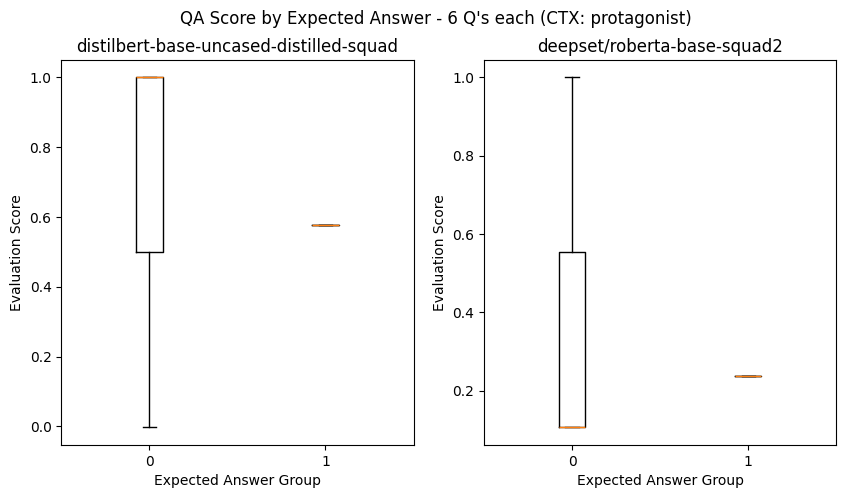

╔═════════════════════════════════════════╦═════════╦══════════════════════════════════════════════╦═════════╦════════╦════════╗
║ Model                                   ║ A Idx   ║ Expected Answer                              ║     Min ║   Mean ║    Max ║
╠═════════════════════════════════════════╬═════════╬══════════════════════════════════════════════╬═════════╬════════╬════════╣
║ distilbert-base-uncased-distilled-squad ║ 0       ║ Sherlock Holmes                              ║ -0.0026 ║ 0.6658 ║ 1      ║
╠═════════════════════════════════════════╬═════════╬══════════════════════════════════════════════╬═════════╬════════╬════════╣
║ deepset/roberta-base-squad2             ║ 0       ║ Sherlock Holmes                              ║  0.1067 ║ 0.4044 ║ 1      ║
╠═════════════════════════════════════════╬═════════╬══════════════════════════════════════════════╬═════════╬════════╬════════╣
║ distilbert-base-uncased-distilled-squad ║ 1       ║ Nervous, delicate, nonchalant, extraordinar

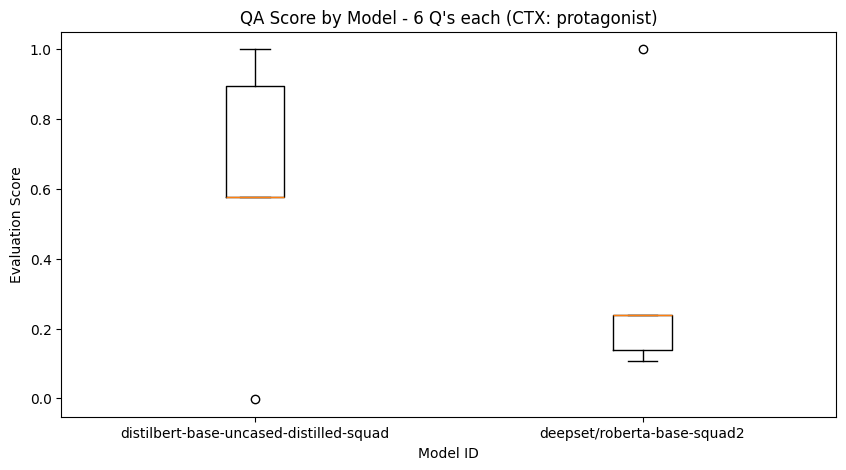

╔═════════════════════════════════════════╦═════════╦════════╦═══════╗
║ Model                                   ║     Min ║   Mean ║   Max ║
╠═════════════════════════════════════════╬═════════╬════════╬═══════╣
║ distilbert-base-uncased-distilled-squad ║ -0.0026 ║ 0.6211 ║     1 ║
╠═════════════════════════════════════════╬═════════╬════════╬═══════╣
║ deepset/roberta-base-squad2             ║  0.1067 ║ 0.3211 ║     1 ║
╠═════════════════════════════════════════╬═════════╬════════╬═══════╣
║ Avg                                     ║  0.052  ║ 0.4711 ║     1 ║
╚═════════════════════════════════════════╩═════════╩════════╩═══════╝



In [4]:
ctx_name = "protagonist"

for i, (fname, ctx) in enumerate(utils.read_context(ctx_name)):
    print("#" * 80)
    print("#" * 80)
    print(ctx)

    # scores_by_question = {m: defaultdict(list) for m in models}
    scores_by_question = defaultdict(list)
    scores_by_answer = {m: defaultdict(list) for m in models}
    scores_by_model = defaultdict(list)

    for j, (question, true_answer) in enumerate(utils.read_qa(ctx_name)):
        print("=" * 80)
        print("=" * 80)
        print(f"Current Question: {question}")
        print(f"Expected Answer: {true_answer}")

        # for k in range(5):
        answers, scores = run_models(
            question,
            ctx,
            models,
            expected_answer=true_answer,
        )

        for k, (m, s) in enumerate(zip(models, scores)):
            scores_by_model[m].append(s)
            scores_by_answer[m][true_answer].append(s)
            scores_by_question[m].append(
                dict(
                    question=question,
                    answer=answers[k],
                    score=s,
                )
            )

    utils.create_plots(ctx_name, scores_by_model, scores_by_answer, scores_by_question)

    print()


Found: ['antagonist.0.md', 'antagonist.qa.md']
################################################################################
################################################################################
His name, I have every reason to believe, is Jonathan Small. He is a poorly-educated man, small, active, with his right leg off, and wearing a wooden stump which is worn away upon the inner side. His left boot has a coarse, square-toed sole, with an iron band round the heel. He is a middle-aged man, much sunburned, and has been a convict. These few indications may be of some assistance to you, coupled with the fact that there is a good deal of skin missing from the palm of his hand. The other man-" "Ah! the other man-?" asked Athelney Jones, in a sneering voice, but impressed none the less, as I could easily see, by the precision of the other's manner. "Is a rather curious person," said Sherlock Holmes, turning upon his heel. "I hope before very long to be able to introduce you to

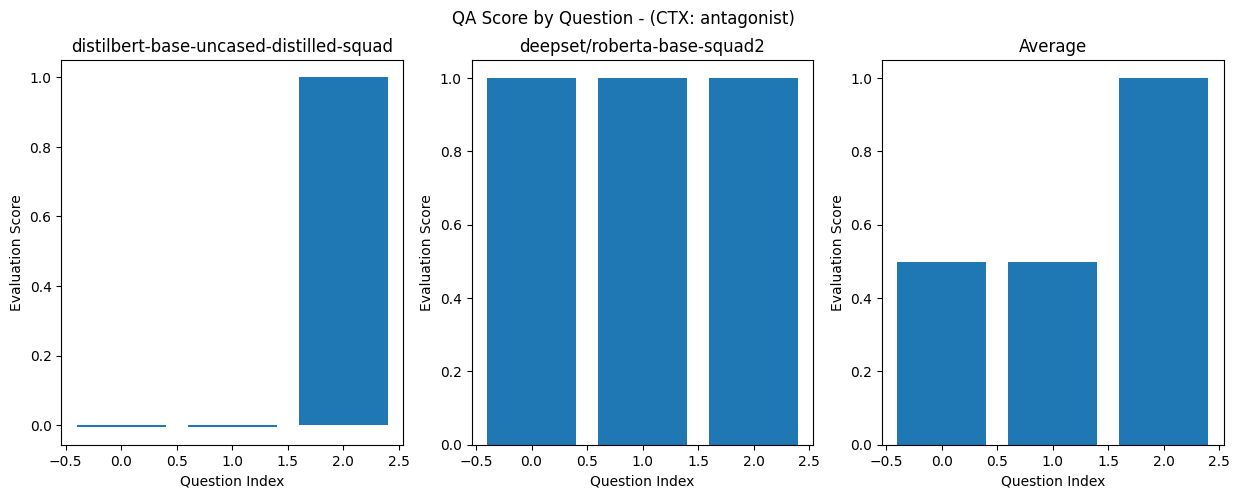

╔═════════╦═════════════════════════════════════════╦═════════╦════════════════════════════════════════════════════════════╦════════════════╗
║ Q Idx   ║ Model                                   ║   Score ║ Question                                                   ║ Answer         ║
╠═════════╬═════════════════════════════════════════╬═════════╬════════════════════════════════════════════════════════════╬════════════════╣
║ 0       ║ distilbert-base-uncased-distilled-squad ║ -0.006  ║ Who is the primary antagonist or perpetrator in the story? ║ Miss Morstan   ║
╠═════════╬═════════════════════════════════════════╬═════════╬════════════════════════════════════════════════════════════╬════════════════╣
║ 0       ║ deepset/roberta-base-squad2             ║  1      ║ Who is the primary antagonist or perpetrator in the story? ║ Jonathan Small ║
╠═════════╬═════════════════════════════════════════╬═════════╬════════════════════════════════════════════════════════════╬════════════════╣
║ 1   

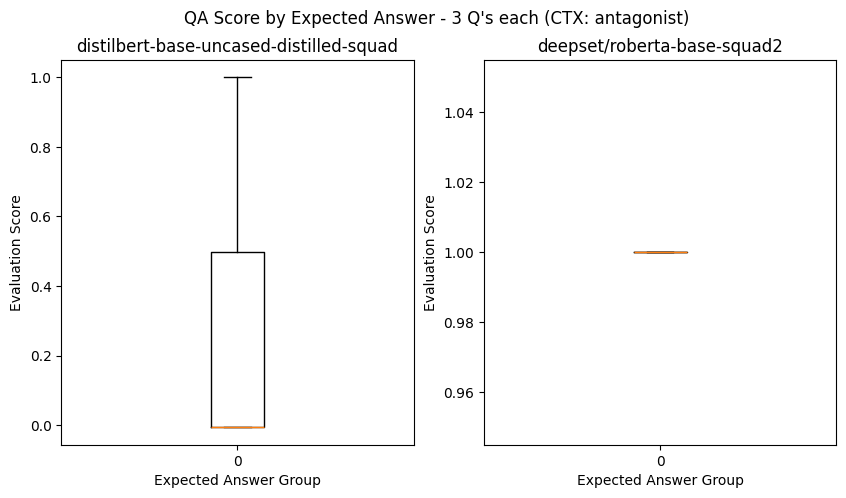

╔═════════════════════════════════════════╦═════════╦═══════════════════╦════════╦════════╦═══════╗
║ Model                                   ║ A Idx   ║ Expected Answer   ║    Min ║   Mean ║   Max ║
╠═════════════════════════════════════════╬═════════╬═══════════════════╬════════╬════════╬═══════╣
║ distilbert-base-uncased-distilled-squad ║ 0       ║ Jonathan Small    ║ -0.006 ║ 0.3294 ║     1 ║
╠═════════════════════════════════════════╬═════════╬═══════════════════╬════════╬════════╬═══════╣
║ deepset/roberta-base-squad2             ║ 0       ║ Jonathan Small    ║  1     ║ 1      ║     1 ║
╠═════════════════════════════════════════╬═════════╬═══════════════════╬════════╬════════╬═══════╣
║ Avg                                     ║ -       ║ -                 ║  0.497 ║ 0.6647 ║     1 ║
╚═════════════════════════════════════════╩═════════╩═══════════════════╩════════╩════════╩═══════╝


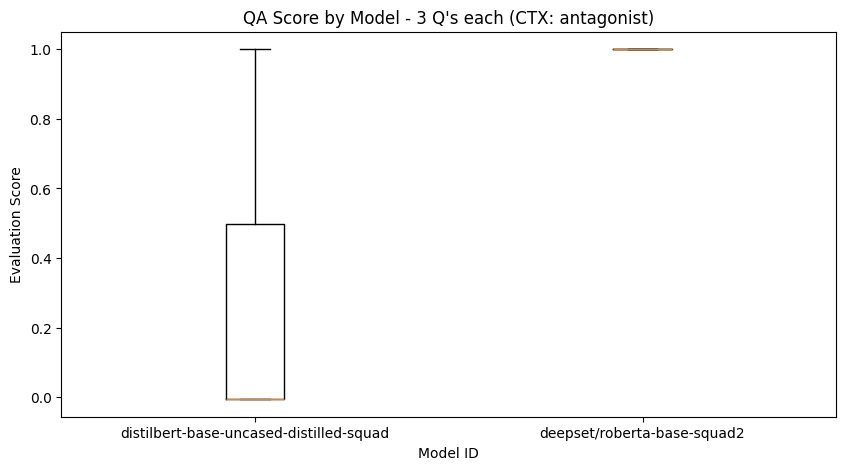

╔═════════════════════════════════════════╦════════╦════════╦═══════╗
║ Model                                   ║    Min ║   Mean ║   Max ║
╠═════════════════════════════════════════╬════════╬════════╬═══════╣
║ distilbert-base-uncased-distilled-squad ║ -0.006 ║ 0.3294 ║     1 ║
╠═════════════════════════════════════════╬════════╬════════╬═══════╣
║ deepset/roberta-base-squad2             ║  1     ║ 1      ║     1 ║
╠═════════════════════════════════════════╬════════╬════════╬═══════╣
║ Avg                                     ║  0.497 ║ 0.6647 ║     1 ║
╚═════════════════════════════════════════╩════════╩════════╩═══════╝



In [5]:
ctx_name = "antagonist"

for i, (fname, ctx) in enumerate(utils.read_context(ctx_name)):
    print("#" * 80)
    print("#" * 80)
    print(ctx)

    # scores_by_question = {m: defaultdict(list) for m in models}
    scores_by_question = defaultdict(list)
    scores_by_answer = {m: defaultdict(list) for m in models}
    scores_by_model = defaultdict(list)

    for j, (question, true_answer) in enumerate(utils.read_qa(ctx_name)):
        print("=" * 80)
        print("=" * 80)
        print(f"Current Question: {question}")
        print(f"Expected Answer: {true_answer}")

        # for k in range(5):
        answers, scores = run_models(
            question,
            ctx,
            models,
            expected_answer=true_answer,
        )

        for k, (m, s) in enumerate(zip(models, scores)):
            scores_by_model[m].append(s)
            scores_by_answer[m][true_answer].append(s)
            scores_by_question[m].append(
                dict(
                    question=question,
                    answer=answers[k],
                    score=s,
                )
            )

    utils.create_plots(ctx_name, scores_by_model, scores_by_answer, scores_by_question)

    print()


Found: ['crime.0.md', 'crime.qa.md']
################################################################################
################################################################################
"We earned a living at this time by my exhibiting poor Tonga at fairs and other such places as the black cannibal. He would eat raw meat and dance his war-dance: so we always had a hatful of pennies after a day's work. I still heard all the news from Pondicherry Lodge, and for some years there was no news to hear, except that they were hunting for the treasure. At last, however, came what we had waited for so long. The treasure had been found. It was up at the top of the house, in Mr. Bartholomew Sholto's chemical laboratory. I came at once and had a look at the place, but I could not see how with my wooden leg I was to make my way up to it. I learned, however, about a trap-door in the roof, and also about Mr. Sholto's supper-hour. It seemed to me that I could manage the thing easily throug

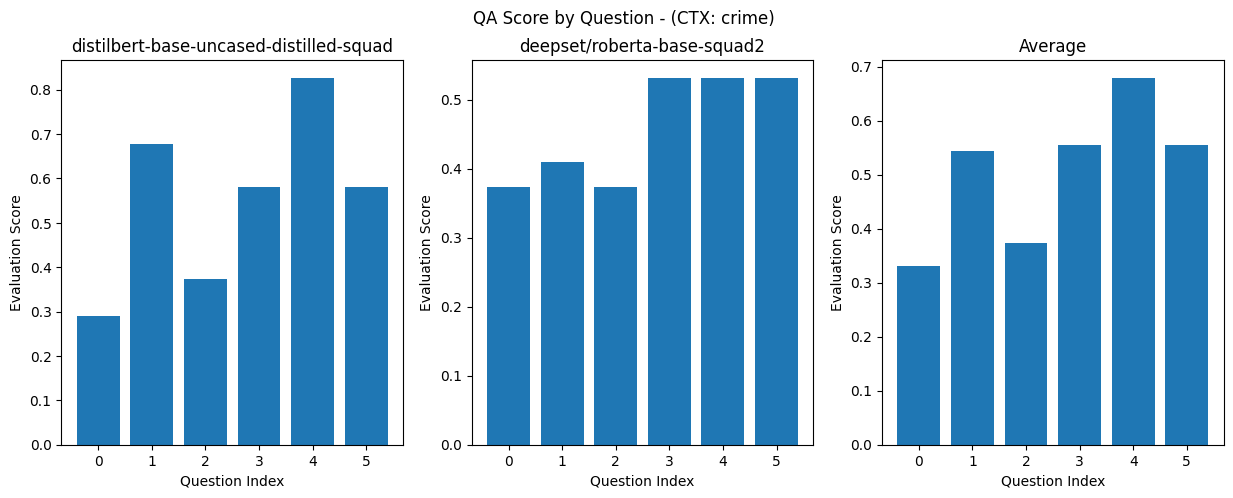

╔═════════╦═════════════════════════════════════════╦═════════╦════════════════════════════════════════════════════════════════════════╦════════════════════════════════════════════════════════════════╗
║ Q Idx   ║ Model                                   ║   Score ║ Question                                                               ║ Answer                                                         ║
╠═════════╬═════════════════════════════════════════╬═════════╬════════════════════════════════════════════════════════════════════════╬════════════════════════════════════════════════════════════════╣
║ 0       ║ distilbert-base-uncased-distilled-squad ║  0.2893 ║ What type of crime was committed?                                      ║ blood-thirsty imp                                              ║
╠═════════╬═════════════════════════════════════════╬═════════╬════════════════════════════════════════════════════════════════════════╬════════════════════════════════════════════════════════

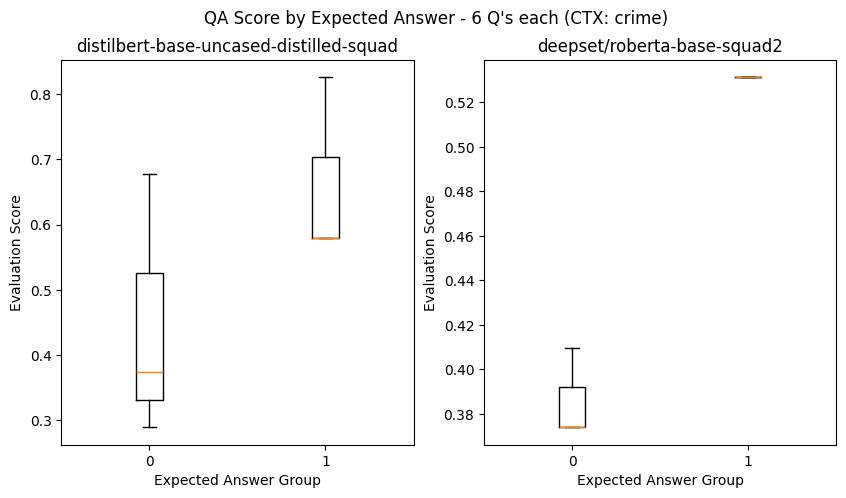

╔═════════════════════════════════════════╦═════════╦═══════════════════════════════════════════════════════════════╦════════╦════════╦════════╗
║ Model                                   ║ A Idx   ║ Expected Answer                                               ║    Min ║   Mean ║    Max ║
╠═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════╬════════╬════════╬════════╣
║ distilbert-base-uncased-distilled-squad ║ 0       ║ Theft of a treasure                                           ║ 0.2893 ║ 0.447  ║ 0.6776 ║
╠═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════╬════════╬════════╬════════╣
║ deepset/roberta-base-squad2             ║ 0       ║ Theft of a treasure                                           ║ 0.374  ║ 0.3859 ║ 0.4098 ║
╠═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════╬════════╬════

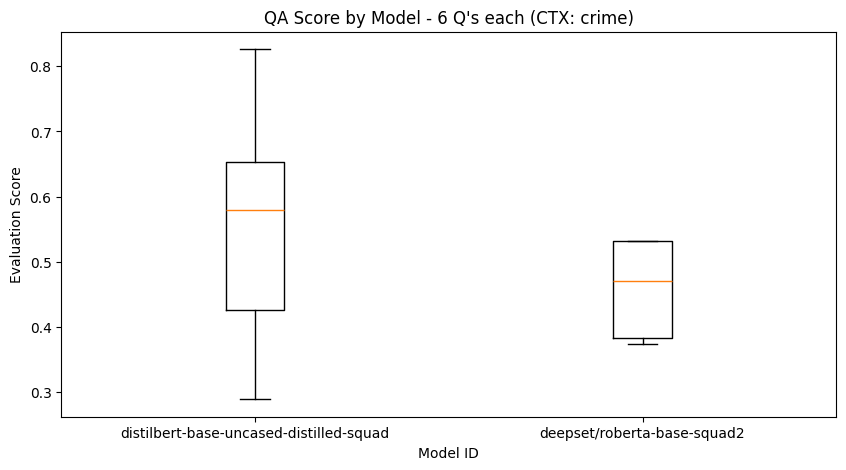

╔═════════════════════════════════════════╦════════╦════════╦════════╗
║ Model                                   ║    Min ║   Mean ║    Max ║
╠═════════════════════════════════════════╬════════╬════════╬════════╣
║ distilbert-base-uncased-distilled-squad ║ 0.2893 ║ 0.5545 ║ 0.826  ║
╠═════════════════════════════════════════╬════════╬════════╬════════╣
║ deepset/roberta-base-squad2             ║ 0.374  ║ 0.4586 ║ 0.5312 ║
╠═════════════════════════════════════════╬════════╬════════╬════════╣
║ Avg                                     ║ 0.3317 ║ 0.5065 ║ 0.6786 ║
╚═════════════════════════════════════════╩════════╩════════╩════════╝



In [6]:
ctx_name = "crime"

for i, (fname, ctx) in enumerate(utils.read_context(ctx_name)):
    print("#" * 80)
    print("#" * 80)
    print(ctx)

    # scores_by_question = {m: defaultdict(list) for m in models}
    scores_by_question = defaultdict(list)
    scores_by_answer = {m: defaultdict(list) for m in models}
    scores_by_model = defaultdict(list)

    for j, (question, true_answer) in enumerate(utils.read_qa(ctx_name)):
        print("=" * 80)
        print("=" * 80)
        print(f"Current Question: {question}")
        print(f"Expected Answer: {true_answer}")

        # for k in range(5):
        answers, scores = run_models(
            question,
            ctx,
            models,
            expected_answer=true_answer,
        )

        for k, (m, s) in enumerate(zip(models, scores)):
            scores_by_model[m].append(s)
            scores_by_answer[m][true_answer].append(s)
            scores_by_question[m].append(
                dict(
                    question=question,
                    answer=answers[k],
                    score=s,
                )
            )

    utils.create_plots(ctx_name, scores_by_model, scores_by_answer, scores_by_question)

    print()


Found: ['evidence.0.md', 'evidence.qa.md']
################################################################################
################################################################################
"Just sit in the corner there, that your footprints may not complicate matters. Now to work! In the first place, how did these folk come, and how did they go? The door has not been opened since last night. How of the window?" He carried the lamp across to it, muttering his observations aloud the while, but addressing them to himself rather than to me. "Window is snibbed on the inner side. Framework is solid. No hinges at the side. Let us open it. No water-pipe near. Roof quite out of reach. Yet a man has mounted by the window. It rained a little last night. Here is the print of a foot in mould upon the sill. And here is a circular muddy mark, and here again upon the floor, and here again by the table. See here, Watson! This is really a very pretty demonstration." I looked at the round

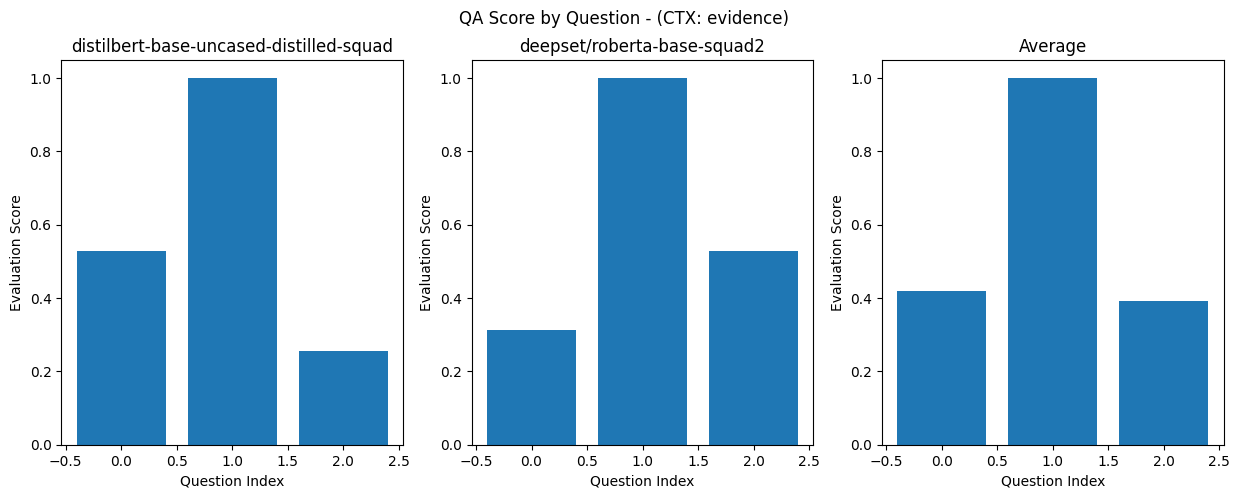

╔═════════╦═════════════════════════════════════════╦═════════╦═══════════════════════════════════════════════════════════════════════════════════╦══════════════════════════════════════════════════════════════╗
║ Q Idx   ║ Model                                   ║   Score ║ Question                                                                          ║ Answer                                                       ║
╠═════════╬═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════╬══════════════════════════════════════════════════════════════╣
║ 0       ║ distilbert-base-uncased-distilled-squad ║  0.5275 ║ What evidence is there to support the prosecution's case against the perpetrator? ║ there has been some one else,-a very able and efficient ally ║
╠═════════╬═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════╬═════════

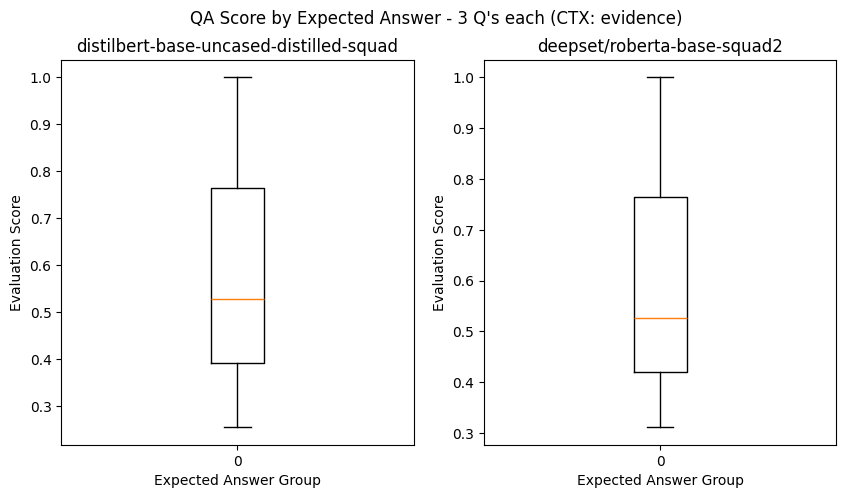

╔═════════════════════════════════════════╦═════════╦════════════════════════════╦════════╦════════╦═══════╗
║ Model                                   ║ A Idx   ║ Expected Answer            ║    Min ║   Mean ║   Max ║
╠═════════════════════════════════════════╬═════════╬════════════════════════════╬════════╬════════╬═══════╣
║ distilbert-base-uncased-distilled-squad ║ 0       ║ the mark of the timber-toe ║ 0.2557 ║ 0.5944 ║     1 ║
╠═════════════════════════════════════════╬═════════╬════════════════════════════╬════════╬════════╬═══════╣
║ deepset/roberta-base-squad2             ║ 0       ║ the mark of the timber-toe ║ 0.3117 ║ 0.613  ║     1 ║
╠═════════════════════════════════════════╬═════════╬════════════════════════════╬════════╬════════╬═══════╣
║ Avg                                     ║ -       ║ -                          ║ 0.2837 ║ 0.6037 ║     1 ║
╚═════════════════════════════════════════╩═════════╩════════════════════════════╩════════╩════════╩═══════╝


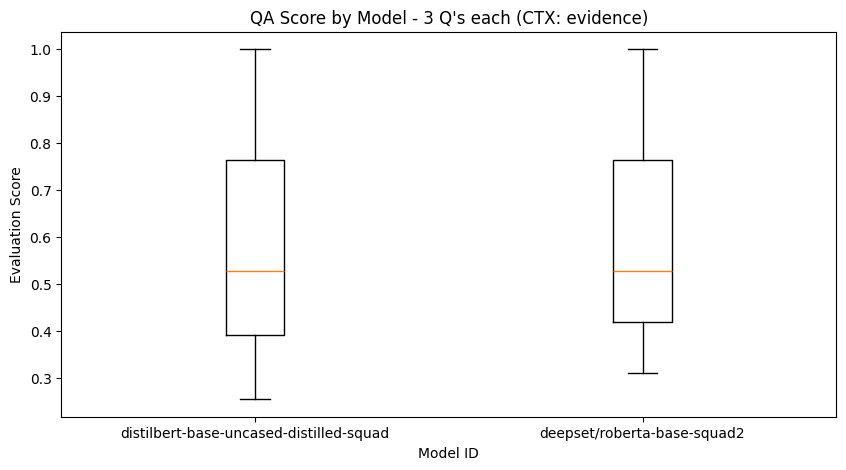

╔═════════════════════════════════════════╦════════╦════════╦═══════╗
║ Model                                   ║    Min ║   Mean ║   Max ║
╠═════════════════════════════════════════╬════════╬════════╬═══════╣
║ distilbert-base-uncased-distilled-squad ║ 0.2557 ║ 0.5944 ║     1 ║
╠═════════════════════════════════════════╬════════╬════════╬═══════╣
║ deepset/roberta-base-squad2             ║ 0.3117 ║ 0.613  ║     1 ║
╠═════════════════════════════════════════╬════════╬════════╬═══════╣
║ Avg                                     ║ 0.2837 ║ 0.6037 ║     1 ║
╚═════════════════════════════════════════╩════════╩════════╩═══════╝



In [7]:
ctx_name = "evidence"

for i, (fname, ctx) in enumerate(utils.read_context(ctx_name)):
    print("#" * 80)
    print("#" * 80)
    print(ctx)

    # scores_by_question = {m: defaultdict(list) for m in models}
    scores_by_question = defaultdict(list)
    scores_by_answer = {m: defaultdict(list) for m in models}
    scores_by_model = defaultdict(list)

    for j, (question, true_answer) in enumerate(utils.read_qa(ctx_name)):
        print("=" * 80)
        print("=" * 80)
        print(f"Current Question: {question}")
        print(f"Expected Answer: {true_answer}")

        # for k in range(5):
        answers, scores = run_models(
            question,
            ctx,
            models,
            expected_answer=true_answer,
        )

        for k, (m, s) in enumerate(zip(models, scores)):
            scores_by_model[m].append(s)
            scores_by_answer[m][true_answer].append(s)
            scores_by_question[m].append(
                dict(
                    question=question,
                    answer=answers[k],
                    score=s,
                )
            )

    utils.create_plots(ctx_name, scores_by_model, scores_by_answer, scores_by_question)

    print()


Found: ['resolution.0.md', 'resolution.qa.md']
################################################################################
################################################################################
A map is drawn for them by an Englishman named Jonathan Small. You remember that we saw the name upon the chart in Captain Morstan's possession. He had signed it in behalf of himself and his associates,-the sign of the four, as he somewhat dramatically called it. Aided by this chart, the officers-or one of them-gets the treasure and brings it to England, leaving, we will suppose, some condition under which he received it unfulfilled. Now, then, why did not Jonathan Small get the treasure himself? The answer is obvious. The chart is dated at a time when Morstan was brought into close association with convicts. Jonathan Small did not get the treasure because he and his associates were themselves convicts and could not get away." "But that is mere speculation," said I. "It is more th

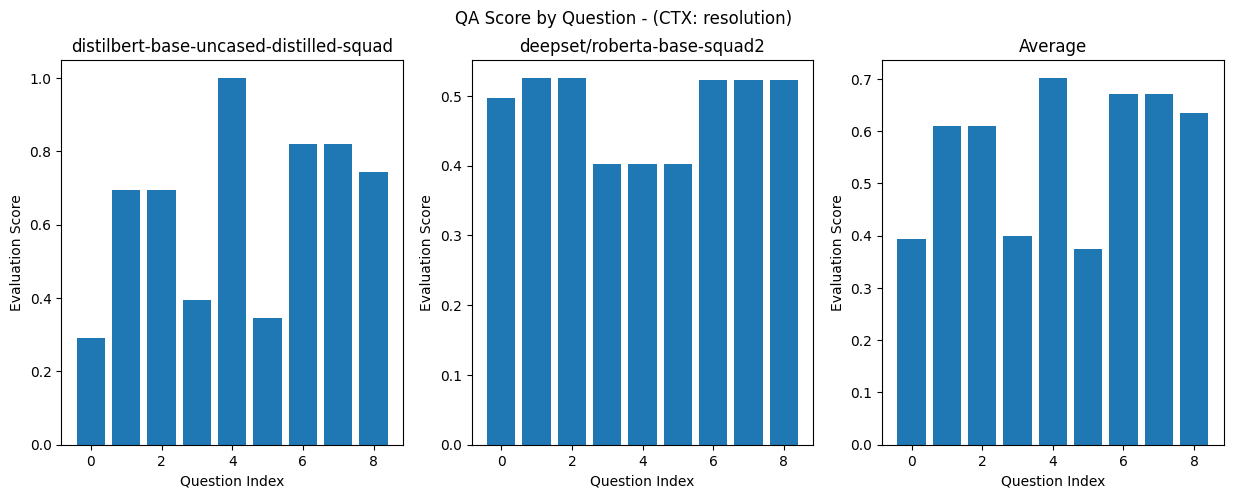

╔═════════╦═════════════════════════════════════════╦═════════╦═══════════════════════════════════════════════════════════════════════════════════════╦═════════════════════════════════════════════════════╗
║ Q Idx   ║ Model                                   ║   Score ║ Question                                                                              ║ Answer                                              ║
╠═════════╬═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════════╬═════════════════════════════════════════════════════╣
║ 0       ║ distilbert-base-uncased-distilled-squad ║  0.2914 ║ What are the key pieces of evidence that suggest the perpetrator committed the crime? ║ Hindoos or Mohammedans                              ║
╠═════════╬═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════════╬═════════════════════════

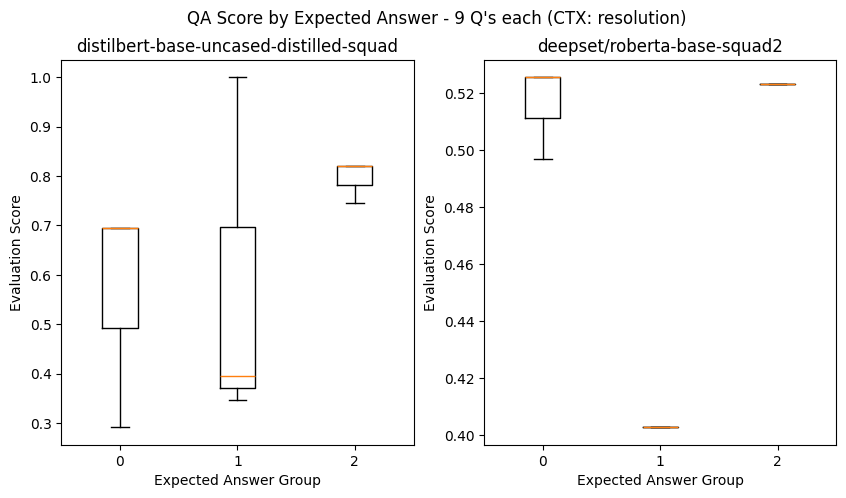

╔═════════════════════════════════════════╦═════════╦═══════════════════════════════════════════════════════════════════════════════════════════════════╦════════╦════════╦════════╗
║ Model                                   ║ A Idx   ║ Expected Answer                                                                                   ║    Min ║   Mean ║    Max ║
╠═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════════════════════╬════════╬════════╬════════╣
║ distilbert-base-uncased-distilled-squad ║ 0       ║ A map is drawn for them by an Englishman named Jonathan Small                                     ║ 0.2914 ║ 0.5598 ║ 0.6941 ║
╠═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════════════════════╬════════╬════════╬════════╣
║ deepset/roberta-base-squad2             ║ 0       ║ A map is drawn for them by an Englishman 

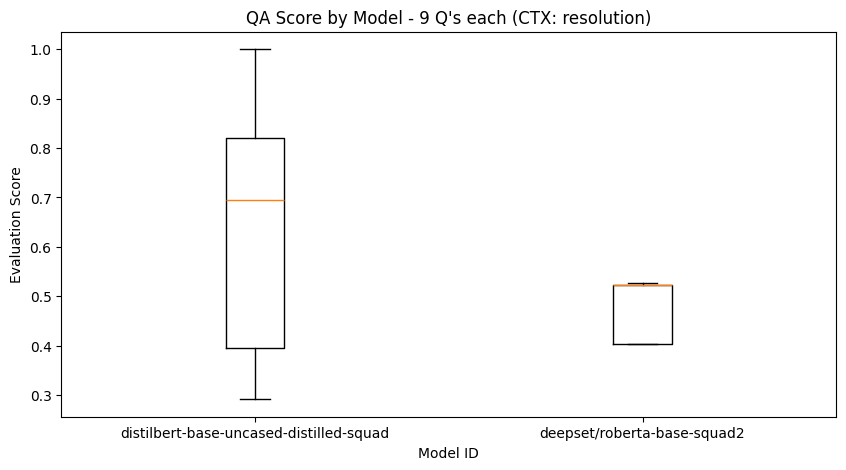

╔═════════════════════════════════════════╦════════╦════════╦════════╗
║ Model                                   ║    Min ║   Mean ║    Max ║
╠═════════════════════════════════════════╬════════╬════════╬════════╣
║ distilbert-base-uncased-distilled-squad ║ 0.2914 ║ 0.6449 ║ 1      ║
╠═════════════════════════════════════════╬════════╬════════╬════════╣
║ deepset/roberta-base-squad2             ║ 0.4029 ║ 0.4807 ║ 0.5257 ║
╠═════════════════════════════════════════╬════════╬════════╬════════╣
║ Avg                                     ║ 0.3471 ║ 0.5628 ║ 0.7628 ║
╚═════════════════════════════════════════╩════════╩════════╩════════╝



In [8]:
ctx_name = "resolution"

for i, (fname, ctx) in enumerate(utils.read_context(ctx_name)):
    print("#" * 80)
    print("#" * 80)
    print(ctx)

    # scores_by_question = {m: defaultdict(list) for m in models}
    scores_by_question = defaultdict(list)
    scores_by_answer = {m: defaultdict(list) for m in models}
    scores_by_model = defaultdict(list)

    for j, (question, true_answer) in enumerate(utils.read_qa(ctx_name)):
        print("=" * 80)
        print("=" * 80)
        print(f"Current Question: {question}")
        print(f"Expected Answer: {true_answer}")

        # for k in range(5):
        answers, scores = run_models(
            question,
            ctx,
            models,
            expected_answer=true_answer,
        )

        for k, (m, s) in enumerate(zip(models, scores)):
            scores_by_model[m].append(s)
            scores_by_answer[m][true_answer].append(s)
            scores_by_question[m].append(
                dict(
                    question=question,
                    answer=answers[k],
                    score=s,
                )
            )

    utils.create_plots(ctx_name, scores_by_model, scores_by_answer, scores_by_question)

    print()
